In [4]:
%pylab inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.


Populating the interactive namespace from numpy and matplotlib


Package: mkl
Message: trial mode expires in 30 days


In [5]:
from __future__ import division

In [6]:
class SystemSolver():
    def __init__(self,updates = None):
        if isinstance(updates,list):
            max_len = max([len(x) for x in updates])
            [x.extend([0]*(max_len-len(x))) for x in updates]
            self.updates = numpy.asarray(updates, dtype = float64)
        else:
            self.updates = updates
        
    @property
    def update_count(self):
        return min(self.updates.shape)-1
    
    def __call__(self,tn,yn,functions,h):
        k = np.zeros(shape=(self.update_count,len(functions)))
        for i in range(self.update_count):
            a = self.updates[i,0]
            b = self.updates[i,1:]
            upd = np.sum(b[:,np.newaxis]*k,axis = 0)
            for j in range(len(functions)):
                k[i,j]= h * functions[j](tn+a*h, yn+upd)
        c = self.updates[self.update_count,1:]
        if self.updates.shape[0]>self.updates.shape[1]:
            c_= self.updates[self.update_count+1,1:]
            return np.sum(c[:,np.newaxis]*k, axis = 0), np.sum(c_[:,np.newaxis]*k, axis = 0)
        return np.sum(c[:,np.newaxis]*k, axis = 0)

In [7]:
euler = SystemSolver([[1],[0,1]])

In [8]:
euler(0,np.array([1.,0.]),[lambda x,ys: np.exp(x), lambda x, ys: np.sin(x)],0.0011)

array([  1.10121067e-03,   1.20999976e-06])

In [9]:
def draw_system(method, t_0, y_0s, approx, exact = None, labels=None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.linspace(t_0,t_0+10,count)
    Y = np.zeros(shape=(len(approx),X.shape[0]))
    if exact:
        RY = np.asarray([y(X) if y is not None else None for y in exact])
    Y[:,0] = np.asarray(y_0s)
    
    for i in np.arange(1,count):
        Y_updates = method(tn=X[i-1],yn=Y[:,i-1],functions=approx,h=step)
        Y[:,i] = Y[:,i-1] + Y_updates
    
    figure_count = len(approx)
    if exact:
        figure_count += len(filter(lambda x: x is not None,exact))
    figure = 1
    plt.figure(figsize = (9,figure_count*3))
    for i in range(len(approx)):
        ax = plt.subplot(figure_count,1,figure)
        if labels and labels[i]:
            ax.set_title(labels[i])
        plt.plot(X,Y[i], color = 'blue', label ='Approx')
        if exact and exact[i]:
            plt.plot(X,RY[i], color = 'red', linestyle='--', label='Exact')
        plt.legend(loc = 'upper left')
        figure += 1

        if exact and exact[i]:
            plt.subplot(figure_count,1,figure)
            plt.plot(X,np.abs(RY[i]-Y[i]), color = 'blue', label= 'Global error')
            plt.legend(loc = 'upper left')
            figure+=1
            
    plt.show()

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


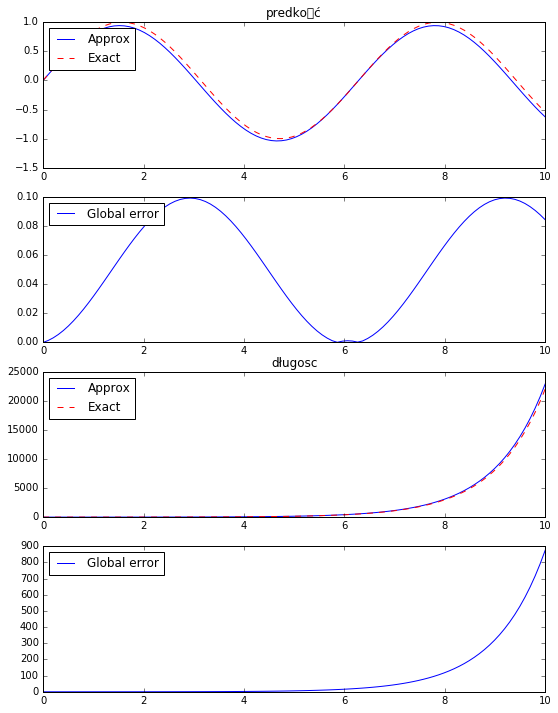

In [10]:
draw_system(euler,
            0,
            [0.,1.],
            [lambda t,ys:np.cos(t),lambda t,ys: np.exp(t)],
            [lambda t: np.sin(t),lambda t: np.exp(t)],
            [u"predkość",u"długosc"])

In [11]:
fehlberg_7_8 = SystemSolver([[0],
                [2/27,2/27],
                [1/9,1/36,1/12],
                [1/6,1/24,0,1/8],
                [5/12,5/12,0,-25/16,25/16],
                [1/2,1/20,0,0,1/4,1/5],
                [5/6,-25/108,0,0,125/108,-65/27,125/54],
                [1/6,31/300,0,0,0,61/225,-2/9,13/900],
                [2/3,2,0,0,-53/6,704/45,-107/9,67/90,3],
                [1/3,-91/108,0,0,23/108,-976/135,311/54,-19/60,17/6,-1/12],
                [1,2383/4100,0,0,-341/164,4496/1025,-301/82,2133/4100,45/82,45/164,18/41],
                [0,3/205,0,0,0,0,-6/41,-3/205,-3/41,3/41,6/41,0],
                [1,-1777/4100,0,0,-341/164,4496/1025,-289/82,2193/4100,51/82,33/164,19/41,0,1],
                [0,41/840,0,0,0,0,34/105,9/35,9/35,9/280,9/280,41/840,0,0],
                [0,0,0,0,0,0,34/105,9/35,9/35,9/280,9/280,0,41/840,43/840]])

In [12]:
fehlberg_7_8(0,[1.],[lambda x,ys: np.exp(x)],0.0011)

(array([ 0.00110061]), array([ 0.00110323]))

In [13]:
def adaprtive_rk(method, t_0, y_0s, approx, exact = None, labels=None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.linspace(t_0,t_0+10,count)
    Y = np.zeros(shape=(len(approx),X.shape[0]))
    if exact:
        RY = np.asarray([y(X) if y is not None else None for y in exact])
    Y[:,0] = np.asarray(y_0s)
    
    for i in np.arange(1,count):
        Y_updates = method(tn=X[i-1],yn=Y[:,i-1],functions=approx,h=step)
        Y[:,i] = Y[:,i-1] + Y_updates
    
    figure_count = len(approx)
    if exact:
        figure_count += len(filter(lambda x: x is not None,exact))
    figure = 1
    plt.figure(figsize = (9,figure_count*3))
    for i in range(len(approx)):
        ax = plt.subplot(figure_count,1,figure)
        if labels and labels[i]:
            ax.set_title(labels[i])
        plt.plot(X,Y[i], color = 'blue', label ='Approx')
        if exact and exact[i]:
            plt.plot(X,RY[i], color = 'red', linestyle='--', label='Exact')
        plt.legend(loc = 'upper left')
        figure += 1

        if exact and exact[i]:
            plt.subplot(figure_count,1,figure)
            plt.plot(X,np.abs(RY[i]-Y[i]), color = 'blue', label= 'Global error')
            plt.legend(loc = 'upper left')
            figure+=1
            
    plt.show()

In [190]:
def eps(y1,y2,eabs=1e-4,erel=0):
    return eabs+erel*(np.abs(y1)+np.abs(y2))/2

def err(step,y1,y2):
    return np.sqrt(1/y1.shape[0]*np.sum(((np.abs(y1)-np.abs(y2))/eps(y1,y2))**2))

def update_step(step, q,y1,y2,factormin=0.5, factormax=5., factor=0.9):
    maks = np.max(factor*(1/err(step,y1,y2))**(1/(q+1)))
    return step*min(factormax,maks)

In [191]:
def check_step(step,y1,y2):
    if np.sum(np.abs(y1-y2) >= eps(y1,y2)) == 0:
        return True
    else:
        return False

In [198]:
def adaptive_rk(method, t_0, y_0s, approx, exact = None, labels=None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.zeros(shape=(count,))
    X[0] = t_0
    Y = np.zeros(shape=(len(approx),X.shape[0]))
    if exact:
        RY = np.asarray([y(X) if y is not None else None for y in exact])
    Y[:,0] = np.asarray(y_0s)
    
    i = 1
    X[0] = t_0
    while X[i-1]<10:
        y_1, y_2 = method(tn=X[i-1],yn=Y[:,i-1],functions=approx,h=step)
        if check_step(step,Y[:,i-1]+y_1,Y[:,i-1]+y_2) == False:
            step = update_step(step,7,Y[:,i-1]+y_1,Y[:,i-1]+y_2)
            print "stepchange"
        else:
            Y[:,i] = Y[:,i-1] + y_2
            X[i] = X[i-1] + step
            i+=1
            
    
    figure_count = len(approx) + 1
    if exact:
        figure_count += len(filter(lambda x: x is not None,exact))
    figure = 1
    plt.figure(figsize = (9,figure_count*3))
    for i in range(len(approx)):
        ax = plt.subplot(figure_count,1,figure)
        if labels and labels[i]:
            ax.set_title(labels[i])
        plt.plot(X,Y[i], color = 'blue', label ='Approx')
        if exact and exact[i]:
            plt.plot(X,RY[i], color = 'red', linestyle='--', label='Exact')
        plt.legend(loc = 'upper left')
        figure += 1

        if exact and exact[i]:
            plt.subplot(figure_count,1,figure)
            plt.plot(X,np.abs(RY[i]-Y[i]), color = 'blue', label= 'Global error')
            plt.legend(loc = 'upper left')
            figure+=1
    
    plt.subplot(figure_count+1,1,figure+1)
    plt.plot((X-np.roll(X,1))[1:])
    plt.show()
    return X

In [197]:
x = adaptive_rk(fehlberg_7_8,
            0,
            [0.1,0.],
            [lambda t,ys: ys[1],lambda t,ys: -3.*ys[1]/(3.*20)-10/20*np.sin(ys[0])],
            labels=[u"pozycja",u"predkosc"],
            step = 0.1)

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


IndexError: index 100 is out of bounds for axis 1 with size 100

In [144]:
import pandas as pd

In [145]:
pd.DataFrame(x-np.roll(x,1))

,0
0,-78.156792
1,0.103493
2,0.123005
3,0.154317
4,0.200168
5,0.265404
6,0.348260
7,0.428350
8,0.486936
9,0.499443
